In [1]:
from pandas import read_csv, DataFrame
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We read the dataset using the **read_csv** command from the Pandas library, load it into the dataset variable, and see the original 5 lines of the dataset using the **head** command

In [3]:
dataset = read_csv('forex_usd_data.csv',',', index_col=['date(y-m-d)'], parse_dates=['date(y-m-d)'], dayfirst=True)
dataset.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,Argentine Peso,Australian Dollar,Bahraini Dinar,Botswana Pula,Brazilian Real,Bruneian Dollar,Bulgarian Lev,Canadian Dollar,Chilean Peso,Chinese Yuan Renminbi,...,Sri Lankan Rupee,Swedish Krona,Swiss Franc,Taiwan New Dollar,Thai Baht,Trinidadian Dollar,Turkish Lira,Emirati Dirham,British Pound,Venezuelan Bolivar
date(y-m-d),,,,,,,,,,,,,,,,,,,,,
2011-01-01,3.9690,0.977326,0.377050,6.472492,1.659500,1.284500,1.463830,0.997700,467.750000,6.5910,...,110.940002,6.721450,0.934500,29.140000,30.020000,6.34,1.537400,3.67310,0.640553,4.3
2011-01-02,3.9690,0.977326,0.377050,6.472492,1.659500,1.283500,1.463830,0.997700,467.750000,6.5910,...,110.940002,6.721450,0.933800,29.099001,30.020000,6.34,1.537400,3.67310,0.641067,4.3
2011-01-03,3.9735,0.980569,0.377055,6.472492,1.646288,1.284367,1.462799,0.990444,465.649994,6.5910,...,110.919998,6.693788,0.933069,29.120000,30.084999,6.39,1.557411,3.67320,0.645615,4.3
2011-01-04,3.9710,0.995580,0.377060,6.480881,1.666747,1.287438,1.469525,0.999076,487.850006,6.6080,...,110.820000,6.726967,0.947903,29.175004,30.104903,6.36,1.547801,3.67315,0.641558,4.3
2011-01-05,3.9715,0.999522,0.377050,6.548788,1.670312,1.291450,1.485031,0.994376,495.149993,6.5885,...,110.820000,6.766127,0.964490,29.170000,30.216193,6.38,1.543853,3.67310,0.645308,4.3


We use the **tail** command to view the last 5 lines of the dataset

In [4]:
dataset.tail()

,Argentine Peso,Australian Dollar,Bahraini Dinar,Botswana Pula,Brazilian Real,Bruneian Dollar,Bulgarian Lev,Canadian Dollar,Chilean Peso,Chinese Yuan Renminbi,...,Sri Lankan Rupee,Swedish Krona,Swiss Franc,Taiwan New Dollar,Thai Baht,Trinidadian Dollar,Turkish Lira,Emirati Dirham,British Pound,Venezuelan Bolivar
date(y-m-d),,,,,,,,,,,,,,,,,,,,,
2021-09-26,98.596130,1.376780,0.376,11.146615,5.335950,1.353748,1.668693,1.265426,792.874422,6.466564,...,199.729819,8.652500,0.923508,27.784851,33.455482,6.796675,8.879794,3.6725,0.730833,4.037413e+11
2021-09-27,98.665631,1.372968,0.376,11.146657,5.355233,1.353849,1.671272,1.264472,793.844825,6.457578,...,200.023988,8.705795,0.925563,27.717801,33.577771,6.795261,8.822537,3.6725,0.729314,4.095173e+11
2021-09-28,98.674155,1.381914,0.376,11.146673,5.428542,1.357311,1.674269,1.269373,800.776625,6.460886,...,199.748422,8.731192,0.928344,27.782899,33.856132,6.791486,8.882934,3.6725,0.738800,4.191933e+11
2021-09-29,98.706016,1.390954,0.376,11.146754,5.406149,1.360433,1.684239,1.274953,805.680213,6.470947,...,199.775029,8.787677,0.933490,27.838824,33.955285,6.791087,8.892252,3.6725,0.744258,4.115676e+11
2021-09-30,98.736445,1.383440,0.376,11.311807,5.448215,1.358174,1.689414,1.267304,809.029363,6.446639,...,199.765848,8.759269,0.933964,27.842308,33.657387,6.791447,8.889614,3.6725,0.742524,4.191044e+11


**using the** columns command, we can see the dataset columns, which means that we can find out what currencies are in dataset other than tenge

In [5]:
dataset.columns

Index(['Argentine Peso', 'Australian Dollar', 'Bahraini Dinar',
       'Botswana Pula', 'Brazilian Real', 'Bruneian Dollar', 'Bulgarian Lev',
       'Canadian Dollar', 'Chilean Peso', 'Chinese Yuan Renminbi',
       'Colombian Peso', 'Croatian Kuna', 'Czech Koruna', 'Danish Krone',
       'Euro', 'Hong Kong Dollar', 'Hungarian Forint', 'Icelandic Krona',
       'Indian Rupee', 'Indonesian Rupiah', 'Iranian Rial', 'Israeli Shekel',
       'Japanese Yen', 'Kazakhstani Tenge', 'South Korean Won',
       'Kuwaiti Dinar', 'Libyan Dinar', 'Malaysian Ringgit', 'Mauritian Rupee',
       'Mexican Peso', 'Nepalese Rupee', 'New Zealand Dollar',
       'Norwegian Krone', 'Omani Rial', 'Pakistani Rupee', 'Philippine Peso',
       'Polish Zloty', 'Qatari Riyal', 'Romanian New Leu', 'Russian Ruble',
       'Saudi Arabian Riyal', 'Singapore Dollar', 'South African Rand',
       'Sri Lankan Rupee', 'Swedish Krona', 'Swiss Franc', 'Taiwan New Dollar',
       'Thai Baht', 'Trinidadian Dollar', 'Turkish L

We assign the desired currency to the variable **df** 

In [6]:
df=dataset['Kazakhstani Tenge']
df.head()

date(y-m-d)
2011-01-01    147.300003
2011-01-02    147.300003
2011-01-03    147.325012
2011-01-04    147.320007
2011-01-05    147.075012
Name: Kazakhstani Tenge, dtype: float64

through the **plot** team of the matplotlib library, we can track changes in tenge in 2011 and 2021

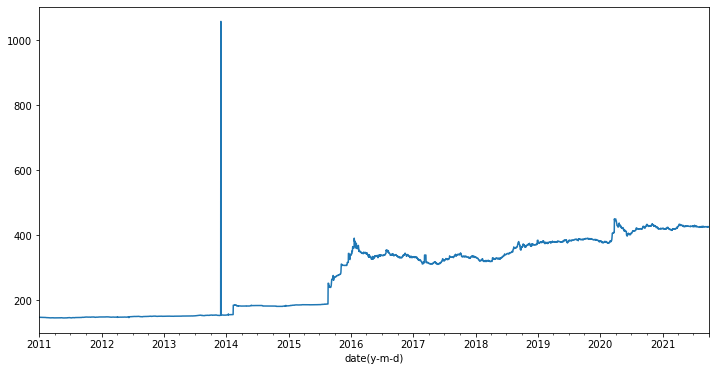

In [7]:
df.plot(figsize=(12,6))

using **describe** and **hist**, we produce histograms with a statistical value of the dataset

count    3926.000000
mean      277.522980
std       108.255048
min       145.174988
25%       153.282223
50%       320.785004
75%       376.770561
max      1058.500000
Name: Kazakhstani Tenge, dtype: float64

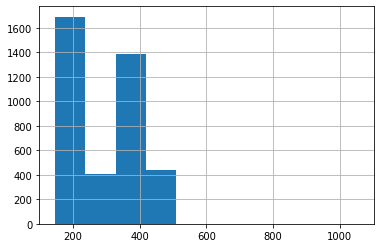

In [8]:
itog = df.describe()
df.hist()
itog

We use the variance coefficient to find out whether the distribution is homogeneous or inhomogeneous. In statistics, if the coefficient of variation is higher than 33%, the distribution indicates that it is not homogeneous. $\sigma$ - standard deviation, $k$ - expectation.

\begin{equation}
 CV = ( \sigma / k ) * 100 
\end{equation}

In [9]:
print ('V = %f' % (itog['std']/itog['mean']))

V = 0.390076


To find out if the dataset is a Gaussian (normal) distribution, we perform the Harkey-Bera test.

In [10]:
row =  [u'JB', u'p-value', u'skew', u'kurtosis']
jb_test = sm.stats.stattools.jarque_bera(df)
a = np.vstack([jb_test])
itog = SimpleTable(a, row)
print(itog)

        JB                p-value                skew            kurtosis    
-----------------------------------------------------------------------------
32.429101620712096 9.080506142232988e-08 0.13755561524275914 2.64992015307982
-----------------------------------------------------------------------------


Looking at the result, we can say that the distribution is not a Gaussian distribution, because p-value
(probability>0.05)

Many algorithms are based on the stationary nature of the time census. In order to test this, we will conduct a Dickey-Fuller test. The rest is based on finding a unit root (single root test). Unit root is a property found in some non-stationary time censuses

In [11]:
test = sm.tsa.adfuller(df)
print('adf: ', test[0]) 
print ('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('бірлік түбір бар, санақ стационарлы емес')
else:
    print('бірлік түбір жоқ, санақ стационарлы')

adf:  -0.5890221351509323
p-value:  0.8734433301209854
Critical values:  {'1%': -3.4320291410434756, '5%': -2.862281952556662, '10%': -2.567164950169587}
бірлік түбір бар, санақ стационарлы емес


In many cases, the series can be converted into a stationary series by getting the difference between the series

In [12]:
otg1diff = df.diff(periods=1).dropna()

the diff () function calculates the difference of the original series along with the offset of a given period. The replacement period is set as the period parameter. Since the first value is unknown in the difference, we need to get rid of it and use the dropna () method.

In [13]:
test = sm.tsa.adfuller(otg1diff)
print ('adf: ', test[0])
print ('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('бірлік түбір бар, санақ стационарлы емес')
else:
    print('бірлік түбір жоқ, санақ стационарлы')

adf:  -17.976031462484226
p-value:  2.785154738111301e-30
Critical values:  {'1%': -3.4320291410434756, '5%': -2.862281952556662, '10%': -2.567164950169587}
бірлік түбір жоқ, санақ стационарлы


In order to make sure that the series is stationary, we divide the series into two parts and compare the care of each math expectation

In [14]:
m = otg1diff.index[len(otg1diff.index)//2+1]
r1 = sm.stats.DescrStatsW(otg1diff[m:])
r2 = sm.stats.DescrStatsW(otg1diff[:m])
print('p-value: ', sm.stats.CompareMeans(r1,r2).ttest_ind()[1])

p-value:  0.9471053594538399


Since the probability of origin is high, we can find out that the zero hypothesis is correct, which means that the series is stationary. We will create a new graphic to make sure

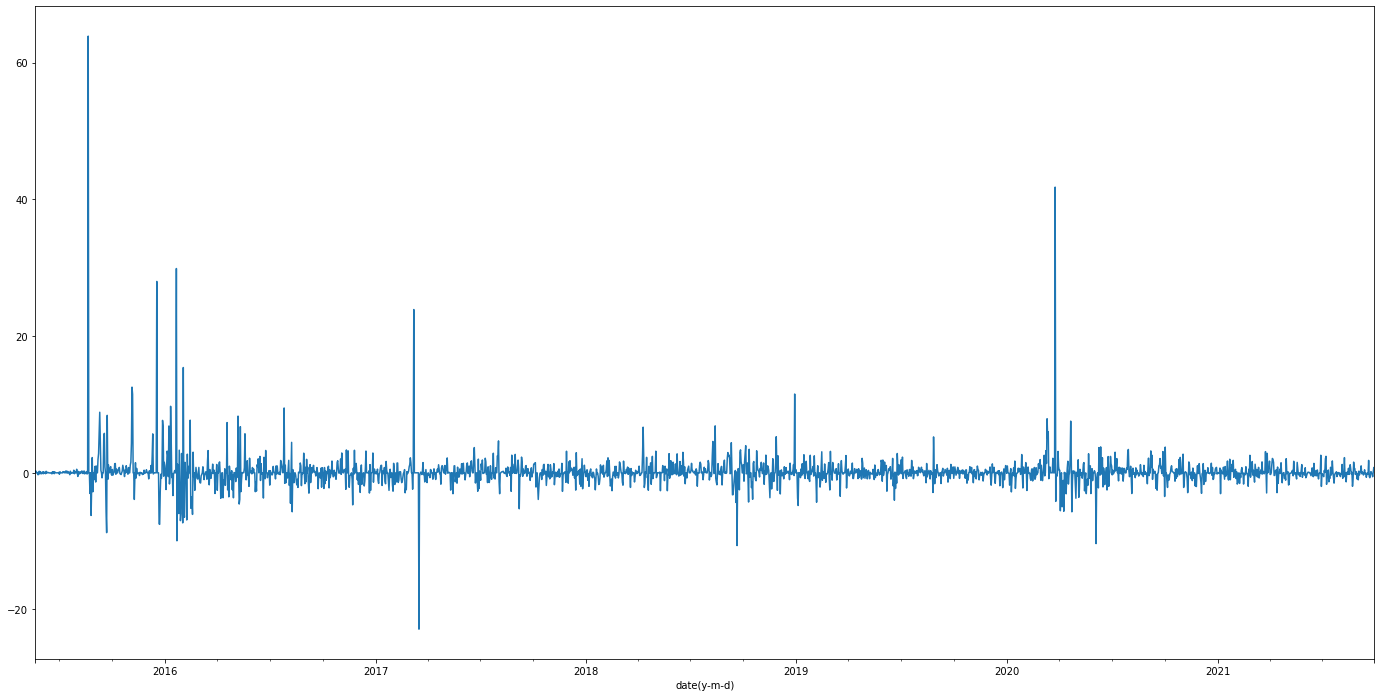

In [15]:
otg1diff[1600:].plot(figsize=(24,12))

# **SARIMA**

Before applying the SARIMA model, it is necessary to determine the values of hyperparameters. The SARIMA model has 6 hyperparameters

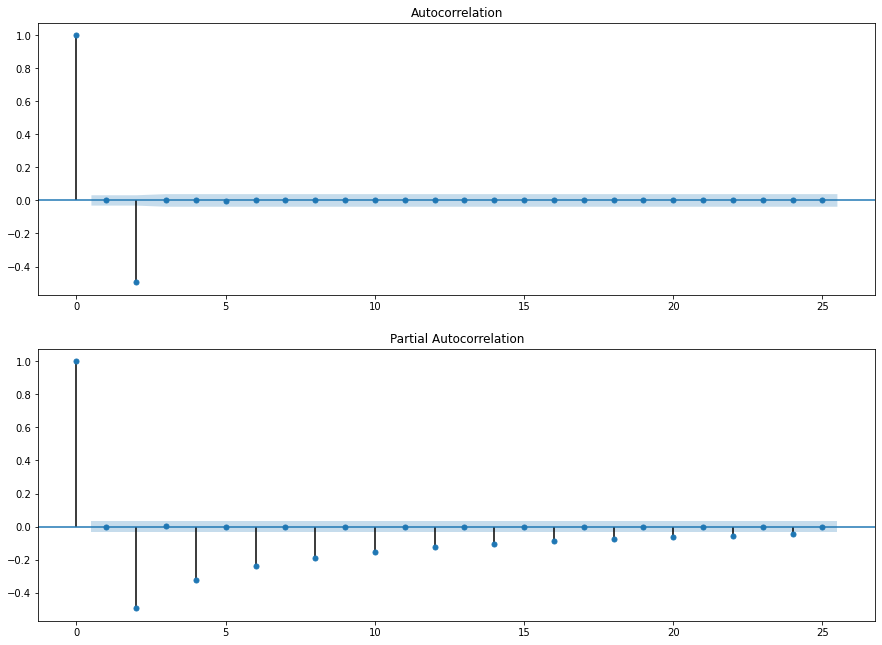

<Figure size 1080x792 with 0 Axes>

In [16]:
fig=plt.figure(figsize=(15,11))
ig = plt.figure(figsize=(15,11))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(otg1diff.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(otg1diff, lags=25, ax=ax2)

I assign to the src_data_model variable the value of the dataset in dollars as of 01.09.2021 and also train the SARIMA model

In [17]:
src_data_model = df[:'2021-09-01']
model = sm.tsa.SARIMAX(src_data_model, order=(1,1,1), freq='D').fit(full_output=False, disp=0)

In [18]:
pred = model.predict('2021-09-01','2021-09-30', typ='levels')
y_true = df['2021-09-01':'2021-09-30']

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [20]:
print('MSE:', mean_squared_error(y_true,pred[0:30]))

MSE: 0.32753725481717133


In [21]:
print('MAE:', mean_absolute_error(y_true,pred[0:30]))

MAE: 0.5171340681658307


In [22]:
import math
print('RMSE:', math.sqrt(mean_squared_error(y_true,pred[0:30])))

RMSE: 0.5723087058722516


In [23]:
pl=df[3896:3926]

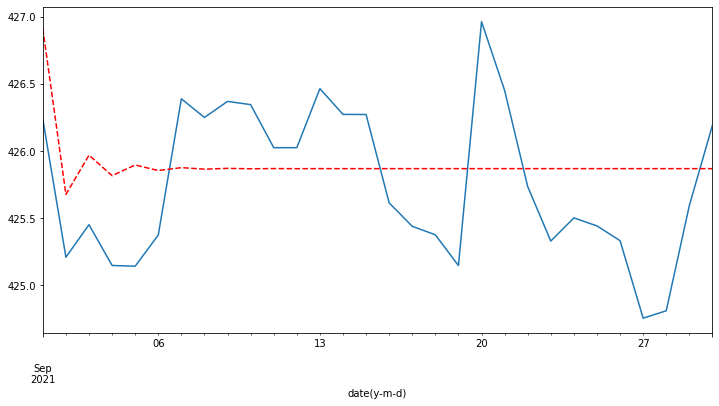

In [24]:
pl.plot(figsize=(12,6))
pred.plot(style='r--')

# **LSTM**

In [25]:
import numpy as np
import math

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [27]:
dataset=df

In [28]:
np.random.seed(7)

In [29]:
dataframe = dataset
dataset = dataframe.values
dataset = dataset.astype('float32')

In [30]:
dataset

array([147.3    , 147.3    , 147.32501, ..., 424.81033, 425.59436,
       426.19287], dtype=float32)

In [31]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))

In [32]:
dataset

array([[0.00232668],
       [0.00232668],
       [0.00235406],
       ...,
       [0.30617288],
       [0.3070313 ],
       [0.30768663]], dtype=float32)

In [33]:
train_size = int(len(dataset) * 0.992)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

3894 32


In [34]:
train.shape, test.shape, dataset.shape

((3894, 1), (32, 1), (3926, 1))

In [35]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [36]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [37]:
trainY

array([0.00232668, 0.00235406, 0.00234857, ..., 0.30818757, 0.30887285,
       0.30860794], dtype=float32)

In [38]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [39]:
trainX

array([[[0.00232668]],

       [[0.00232668]],

       [[0.00235406]],

       ...,

       [[0.30746633]],

       [[0.30818757]],

       [[0.30887285]]], dtype=float32)

In order to improve the result, the Early Stopping method was used.

In [40]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, log={}):
        if(log.get('loss')<0.00041461):
            print("\n Early Stopping!")
            self.model.stop_training=True
callbacks=myCallback()

The LSTM model consists of 3 layers. 2 neurons in the 1st Layer, 4 neurons in the 2nd layer, and 1 neuron in the last layer. Butch's size is equal to 1, and sigmoid was used as an activator of the function.

In [41]:
model = Sequential()
model.add(LSTM(2, input_shape=(1, look_back), return_sequences=True))
model.add(LSTM(4, return_sequences=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2, callbacks=[callbacks])

Epoch 1/100
3892/3892 - 11s - loss: 0.0035 - 11s/epoch - 3ms/step
Epoch 2/100
3892/3892 - 8s - loss: 4.7903e-04 - 8s/epoch - 2ms/step
Epoch 3/100
3892/3892 - 8s - loss: 4.5837e-04 - 8s/epoch - 2ms/step
Epoch 4/100
3892/3892 - 7s - loss: 4.4432e-04 - 7s/epoch - 2ms/step
Epoch 5/100
3892/3892 - 8s - loss: 4.3983e-04 - 8s/epoch - 2ms/step
Epoch 6/100
3892/3892 - 8s - loss: 4.3323e-04 - 8s/epoch - 2ms/step
Epoch 7/100
3892/3892 - 8s - loss: 4.3844e-04 - 8s/epoch - 2ms/step
Epoch 8/100
3892/3892 - 8s - loss: 4.3171e-04 - 8s/epoch - 2ms/step
Epoch 9/100
3892/3892 - 8s - loss: 4.3311e-04 - 8s/epoch - 2ms/step
Epoch 10/100
3892/3892 - 8s - loss: 4.2963e-04 - 8s/epoch - 2ms/step
Epoch 11/100
3892/3892 - 8s - loss: 4.3680e-04 - 8s/epoch - 2ms/step
Epoch 12/100
3892/3892 - 8s - loss: 4.2782e-04 - 8s/epoch - 2ms/step
Epoch 13/100
3892/3892 - 8s - loss: 4.3125e-04 - 8s/epoch - 2ms/step
Epoch 14/100
3892/3892 - 8s - loss: 4.3151e-04 - 8s/epoch - 2ms/step
Epoch 15/100
3892/3892 - 8s - loss: 4.2770e-0

In [42]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [43]:
trainPredict.shape, testPredict.shape

((3892, 1, 1), (30, 1, 1))

Since the forecast size is (3892, 1, 1), I bring it to (3892, 1)

In [44]:
nsamples, nx, ny = trainPredict.shape
trainPredict = trainPredict.reshape((nsamples,nx*ny))
nsamples, nx, ny = testPredict.shape
testPredict = testPredict.reshape((nsamples,nx*ny))

In [45]:
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

Checking metrics

In [48]:
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
trainScore = mean_squared_error(trainY, trainPredict[:,0])
print('Train Score: %.2f MSE' % (trainScore))
testScore = mean_squared_error(testY, testPredict[:,0])
print('Test Score: %.2f MSE' % (testScore))
trainScore = mean_absolute_error(trainY, trainPredict[:,0])
print('Train Score: %.2f MAE' % (trainScore))
testScore = mean_absolute_error(testY, testPredict[:,0])
print('Test Score: %.2f MAE' % (testScore))

Train Score: 294.72 RMSE
Test Score: 421.99 RMSE
Train Score: 86857.90 MSE
Test Score: 178074.39 MSE
Train Score: 274.72 MAE
Test Score: 421.99 MAE


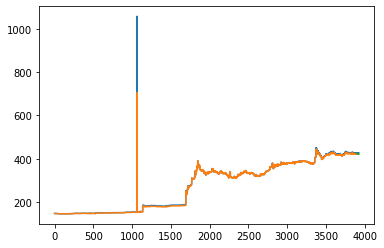

In [49]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [50]:
trainPredict.shape, testPredict.shape

((3892, 1), (30, 1))

In [51]:
testPredict

array([[423.61743],
       [422.80624],
       [422.667  ],
       [421.7533 ],
       [421.9688 ],
       [421.6984 ],
       [421.69354],
       [421.90002],
       [422.80225],
       [422.6788 ],
       [422.78485],
       [422.76367],
       [422.47867],
       [422.47867],
       [422.86942],
       [422.69904],
       [422.69827],
       [422.11304],
       [421.95807],
       [421.9015 ],
       [421.69788],
       [423.31204],
       [422.85767],
       [422.22122],
       [421.86023],
       [422.01367],
       [421.9606 ],
       [421.86295],
       [421.34872],
       [421.39795]], dtype=float32)

In [52]:
import pandas as pd
tt=pd.DataFrame(data=testPredict,
          index=df[3896:].index)

In [53]:
tt

,0
date(y-m-d),
2021-09-01,423.617432
2021-09-02,422.806244
2021-09-03,422.666992
2021-09-04,421.753296
2021-09-05,421.968811
2021-09-06,421.698395
2021-09-07,421.693542
2021-09-08,421.900024
2021-09-09,422.802246


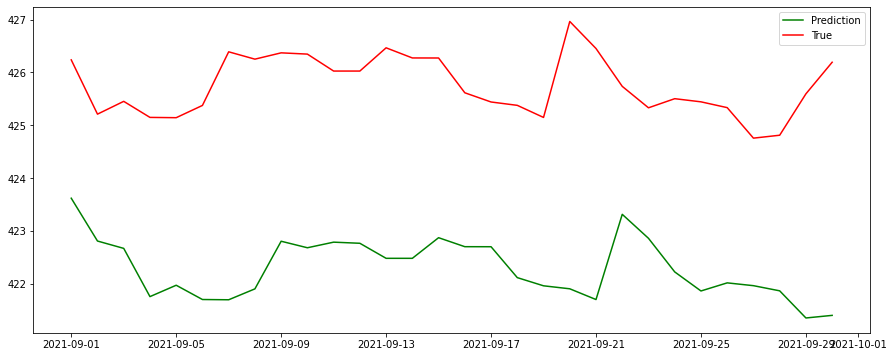

In [54]:
plt.figure(figsize=(15,6))
plt.plot(tt, 'g', label='Prediction')
plt.plot(df[3896:], 'r', label='True')
plt.legend()
plt.show()

# **XGBoost**

In [55]:
from numpy import asarray
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot

In [56]:
ser=df
values=ser.values

In [57]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[0]
    df = DataFrame(data)
    cols = list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    agg = concat(cols, axis=1)
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

In [58]:
def walk_forward_validation(data, n_test):
    predictions = list()
    train, test = train_test_split(data, n_test)
    history = [x for x in train]
    for i in range(len(test)):
        testX, testy = test[i, :-1], test[i, -1]
        yhat = xgboost_forecast(history, testX)
        predictions.append(yhat)
        history.append(test[i])
        print('>True=%.1f, Prediction=%.1f' % (testy, yhat))
    error = mean_absolute_error(test[:, -1], predictions)
    return error, test[:, 1], predictions

In [59]:
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

In [60]:
def xgboost_forecast(train, testX):
    train = asarray(train)
    trainX, trainy = train[:, :-1], train[:, -1]
    model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    model.fit(trainX, trainy)
    yhat = model.predict([testX])
    return yhat[0]

In [61]:
data = series_to_supervised(values, n_in=11)

In [62]:
df

date(y-m-d)
2011-01-01    147.300003
2011-01-02    147.300003
2011-01-03    147.325012
2011-01-04    147.320007
2011-01-05    147.075012
                 ...    
2021-09-26    425.333011
2021-09-27    424.755159
2021-09-28    424.810318
2021-09-29    425.594367
2021-09-30    426.192878
Name: Kazakhstani Tenge, Length: 3926, dtype: float64

In [63]:
data

array([[147.300003, 147.300003, 147.325012, ..., 147.149994, 147.225006,
        147.225006],
       [147.300003, 147.325012, 147.320007, ..., 147.225006, 147.225006,
        147.024994],
       [147.325012, 147.320007, 147.075012, ..., 147.225006, 147.024994,
        146.979996],
       ...,
       [425.439985, 425.376411, 425.147442, ..., 425.333011, 424.755159,
        424.810318],
       [425.376411, 425.147442, 426.965278, ..., 424.755159, 424.810318,
        425.594367],
       [425.147442, 426.965278, 426.452878, ..., 424.810318, 425.594367,
        426.192878]])

In [64]:
mae, y, yhat = walk_forward_validation(data, 30)
print('MAE: %.3f' % mae)

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


>True=426.2, Prediction=426.9
>True=425.2, Prediction=426.4
>True=425.5, Prediction=425.1
>True=425.1, Prediction=425.8
>True=425.1, Prediction=425.4
>True=425.4, Prediction=425.4
>True=426.4, Prediction=425.4
>True=426.3, Prediction=426.9
>True=426.4, Prediction=426.6
>True=426.3, Prediction=427.1
>True=426.0, Prediction=426.4
>True=426.0, Prediction=425.6
>True=426.5, Prediction=425.7
>True=426.3, Prediction=426.4
>True=426.3, Prediction=426.3
>True=425.6, Prediction=426.5
>True=425.4, Prediction=425.3
>True=425.4, Prediction=425.1
>True=425.1, Prediction=425.0
>True=427.0, Prediction=425.1
>True=426.5, Prediction=427.0
>True=425.7, Prediction=426.5
>True=425.3, Prediction=425.9
>True=425.5, Prediction=425.0
>True=425.4, Prediction=424.8
>True=425.3, Prediction=425.3
>True=424.8, Prediction=424.9
>True=424.8, Prediction=425.0
>True=425.6, Prediction=425.2
>True=426.2, Prediction=425.5
MAE: 0.505


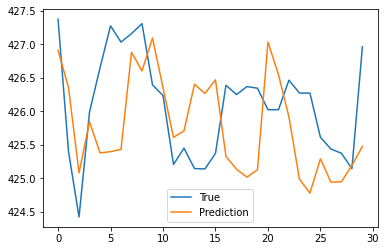

In [66]:
pyplot.plot(y, label='True')
pyplot.plot(yhat, label='Prediction')
pyplot.legend()
pyplot.show()

In [67]:
tt

,0
date(y-m-d),
2021-09-01,423.617432
2021-09-02,422.806244
2021-09-03,422.666992
2021-09-04,421.753296
2021-09-05,421.968811
2021-09-06,421.698395
2021-09-07,421.693542
2021-09-08,421.900024
2021-09-09,422.802246


In [68]:
import pandas as pd
ff=pd.DataFrame(data=yhat,
          index=df[3896:].index)

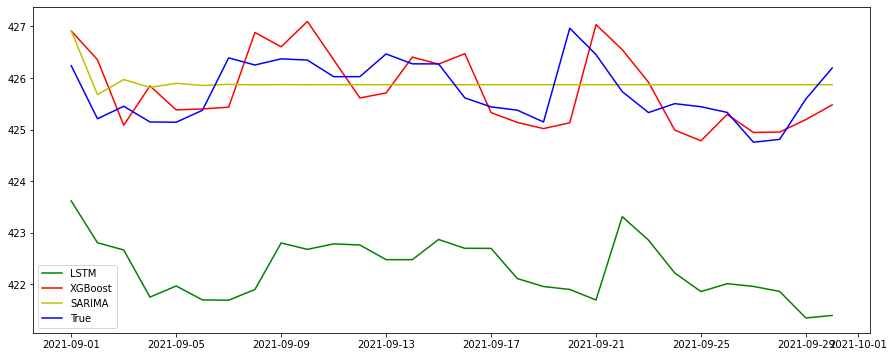

In [69]:
plt.figure(figsize=(15,6))
plt.plot(tt, 'g', label='LSTM')
plt.plot(ff, 'r', label='XGBoost')
plt.plot(pred, 'y', label='SARIMA')
# Plot another line on the same chart/graph
plt.plot(df[3896:], 'b', label='True')

plt.legend()
plt.show()